In [16]:
import torch
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2


In [17]:
import yolov5

# load model
model = yolov5.load('keremberke/yolov5s-smoke')
  
# set model parameters
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

# set image
img = 'ima.jpeg'




YOLOv5  2023-4-28 Python-3.11.3 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


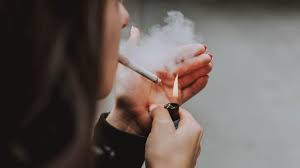

Saved 1 image to results3


In [18]:
# perform inference
results = model(img, size=640)

# inference with test time augmentation
results = model(img, augment=True)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

# show detection bounding boxes on image
results.show()

# save results into "results/" folder
results.save(save_dir='results/')

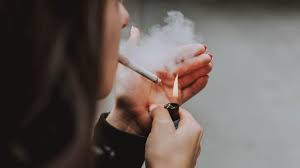

Saved 1 image to results4


In [19]:
# show detection bounding boxes on image
results.show()

# save results into "results/" folder
results.save(save_dir='results/')

In [ ]:
cap = cv2.VideoCapture("C:/Users/praty/OneDrive/Desktop/app/carsmoke.webm")
while cap.isOpened():
	ret,frame = cap.read()
			# Make detections 
	results = model(frame)
	x = results.pandas().xyxy[0]
	print(x)

	cv2.imshow('YOLO', np.squeeze(results.render()))
	if cv2.waitKey(10) & 0xFF == ord('q'):
		break
cap.release()
cv2.destroyAllWindows()